## What is Feature Scaling

Feature scaling is a way of transforming your data into a common range of values.

## When Should I Use Feature Scaling?

In many machine learning algorithms, the result will change depending on the units of your data. This is especially true in two specific cases:

1. When your algorithm uses a distance based metric to predict.
2. When you incorporate regularization.

### Do I need to do feature scaling for simple linear regression and Multiple Linear Regression?
Lets take 3 X with diffrent exponents (or different units) and fit linear regression model You observed that all will give you same prediction but if you did it from scratch without using scikit learn library then you observed the difference between these 3 Features.Actually our line moves up or down using slope and intercept which we are updating again and again to make our line best fit. What if your Features are same but with different exponents or units then you are endng with different slopes in every iteration.
1. for x_low your line will converge slowly due to low value of slope so you have to iterate your line many times.
2. for x_med your line will converge not very slowly due to medium value of slope
3. for x_high your line will converge very fast in just 1 or 2 iterations so you have to give low learning rate

source: https://www.quora.com/Why-do-we-need-feature-scaling-in-context-of-multiple-linear-regression/answer/Roberto-Reif

Lets Try it

TODO: try it using Scikit learn yourself


In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data
X_med = np.linspace(0,1,1001)

X_high = 1e20*X_med

X_low = 1e-20*X_med

y_real = np.cos(2/3*2*np.pi*X_med-np.pi/8)

In [3]:
df = pd.DataFrame({'X_low':X_low,'X_med':X_med,'X_high':X_high,'y_real':y_real})
df

,X_low,X_med,X_high,y_real
0,0.000000e+00,0.000,0.000000e+00,0.923880
1,1.000000e-23,0.001,1.000000e+17,0.925474
2,2.000000e-23,0.002,2.000000e+17,0.927053
3,3.000000e-23,0.003,3.000000e+17,0.928615
4,4.000000e-23,0.004,4.000000e+17,0.930161
...,...,...,...,...
996,9.960000e-21,0.996,9.960000e+19,-0.803441
997,9.970000e-21,0.997,9.970000e+19,-0.800940
998,9.980000e-21,0.998,9.980000e+19,-0.798425
999,9.990000e-21,0.999,9.990000e+19,-0.795896


In [4]:
def error_list(x,y,w_1,w_2):
    #y_pred = w_1 * x + w_2
    y_pred = []
    for i in range(0,len(x)):
        y_pred.append((w_1*x[i])+w_2)
    # error = y - y_pred
    error = []
    for j in range(0,len(x)):
        error.append(y[j] - y_pred[j])
    return error

In [5]:
from sklearn import metrics

def fit_and_plot(x,y,iterate,learning_rate):
    global w_1
    global w_2
    w_1 = 0
    w_2 = 0
    plt.plot(x,y,'o', color='black')
    for i in range(0,iterate): # i am moving line 50times , you can change it
        errors = error_list(x,y,w_1,w_2)  # as w1 and w2 are changing it means that line is also moving so we have to calculate new q-q' w.r.t to new line
        # add (q-q') * x * learning rate in w1
        w_1 += np.matmul(errors,x) * learning_rate  #t=x #matmul ---> multiply array element by element and then add it
        
        # add q-q' * learning_rate in w2
        w_2 += sum(errors)* learning_rate
        print("mean squared_error", sum([i**2 for i in errors])/(2*len(errors))) 
    print(w_1,w_2)
    y_pred = []
    for i in range (0,len(y)):
         y_pred.append((w_1 * x[i]) + w_2)
    plt.plot(x,y_pred) 
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred)) 


    

In [6]:
def predict(x):
    #y = w1*x + w2
    y = []
    for x_value in x:
        y.append(w_1* x_value + w_2)
    return y

mean squared_error 0.29999634165582617
mean squared_error 0.2997205673254769
mean squared_error 0.299497239754516
mean squared_error 0.2993163846187668
mean squared_error 0.29916992451092533
mean squared_error 0.29905131818492986
mean squared_error 0.2989552684088252
mean squared_error 0.29887748537817965
mean squared_error 0.29881449512352465
mean squared_error 0.29876348435486993
mean squared_error 0.29872217481368835
mean squared_error 0.2986887215206346
mean squared_error 0.29866163037452
mean squared_error 0.2986396914223026
mean squared_error 0.29862192481979755
mean squared_error 0.2986075370695801
mean squared_error 0.29859588558155553
mean squared_error 0.29858644997340655
mean squared_error 0.29857880882912063
mean squared_error 0.29857262087757874
mean squared_error 0.2985676097505992
mean squared_error 0.29856355163969833
mean squared_error 0.2985602653002883
mean squared_error 0.2985576039568739
mean squared_error 0.29855544874772477
mean squared_error 0.2985537034162287
m

mean squared_error 0.29854627148624946
mean squared_error 0.2985462714862495
mean squared_error 0.2985462714862494
mean squared_error 0.29854627148624946
mean squared_error 0.29854627148624946
mean squared_error 0.2985462714862495
mean squared_error 0.29854627148624946
mean squared_error 0.29854627148624946
mean squared_error 0.29854627148624946
mean squared_error 0.2985462714862494
mean squared_error 0.29854627148624946
mean squared_error 0.2985462714862494
mean squared_error 0.2985462714862494
mean squared_error 0.2985462714862494
mean squared_error 0.2985462714862494
mean squared_error 0.29854627148624946
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862493
mean squared_error 0.2985462714862492
mean

mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared_error 0.2985462714862492
mean squared

,y_pred,y_real
0,-0.053853,0.923880
1,-0.053853,0.925474
2,-0.053853,0.927053
3,-0.053853,0.928615
4,-0.053853,0.930161
...,...,...
996,-0.053853,-0.803441
997,-0.053853,-0.800940
998,-0.053853,-0.798425
999,-0.053853,-0.795896


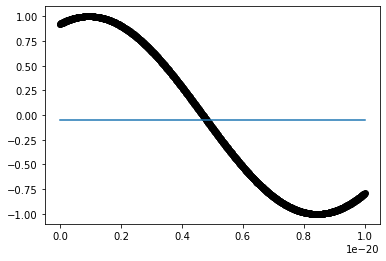

In [7]:
# For x_low as our slope will be low that why in 800 iterations it will converging very low. I think for best fit line you've
# to iterate it more than lacs time
fit_and_plot(X_low,y_real,800,0.0001)
pd.DataFrame({'y_pred':predict(X_low),'y_real':y_real})

mean squared_error 0.29999634165582617
mean squared_error 0.2557262180243289
mean squared_error 0.22481625987326864
mean squared_error 0.1984059327304239
mean squared_error 0.17540394356939842
mean squared_error 0.15533822431869182
mean squared_error 0.1378316185834386
mean squared_error 0.12255757701747332
mean squared_error 0.10923137530477282
mean squared_error 0.09760461202841093
mean squared_error 0.08746056438085979
mean squared_error 0.07861014743475997
mean squared_error 0.07088838952857464
mean squared_error 0.06415135719155933
mean squared_error 0.058273472225281
mean squared_error 0.053145170927545775
mean squared_error 0.04867086182635805
mean squared_error 0.04476714385607973
mean squared_error 0.0413612517626101
mean squared_error 0.03838969975996067
mean squared_error 0.035797098155999185
mean squared_error 0.033535120889280894
mean squared_error 0.03156160473186896
mean squared_error 0.029839763367292927
mean squared_error 0.02833750169407063
mean squared_error 0.027026

,y_pred,y_real
0,1.240648,0.923880
1,1.238059,0.925474
2,1.235469,0.927053
3,1.232880,0.928615
4,1.230291,0.930161
...,...,...
996,-1.338192,-0.803441
997,-1.340781,-0.800940
998,-1.343370,-0.798425
999,-1.345959,-0.795896


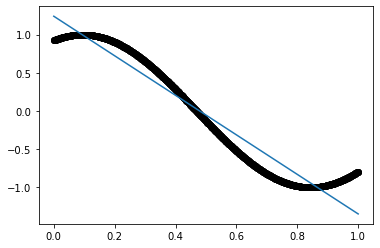

In [8]:
# Medium slope will give you best fit line in 100 iterations only
fit_and_plot(X_med,y_real,100,0.001)
pd.DataFrame({'y_pred':predict(X_med),'y_real':y_real})

mean squared_error 0.29999634165582617
mean squared_error 0.2941672095367975
mean squared_error 0.2887207730682544
-7.0666979554786125e-22 -1.255511505414372e-42
Root Mean Squared Error: 0.7531691807541452
Mean Absolute Error: 0.6947434194882369
Mean Squared Error: 0.5672638148378703
prediction [-7.066697955478613e-25]


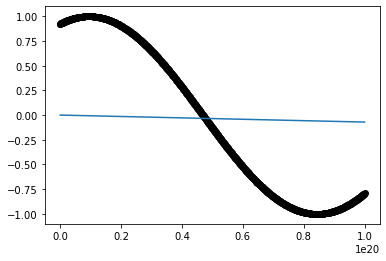

In [9]:
#with previous learning rate it will converge very fast in 2 or 3 iterations that's why our error is increasing so we have to 
#change our learning it
# fit_and_plot(X_high,y_real,3,0.001)

# after using this learning rate we can observed that now our error start deacresing but now you have to iterate it many times
#for best fit line
fit_and_plot(X_high,y_real,3,0.00000000000000000000000000000000000000000001)
pd.DataFrame({'y_pred':predict(X_high),'y_real':y_real})
print("prediction",predict([0.001]))

### If we iterate x_low and x_high many times then we can observed that the predictions of all 3 are same but i can't do it in my computer.
## try it using scikit learn then you can observe same predictions


In [10]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit([X_low],[y_real])
model2 = LinearRegression()
model2.fit([X_med],[y_real])
model3 = LinearRegression()
model3.fit([X_high],[y_real])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#same predictions
print(model1.predict([X_high]))
print(model2.predict([X_high]))
print(model3.predict([X_high]))

[[ 0.92387953  0.9254744   0.92705304 ... -0.79842539 -0.79589635
  -0.79335334]]
[[ 0.92387953  0.9254744   0.92705304 ... -0.79842539 -0.79589635
  -0.79335334]]
[[ 0.92387953  0.9254744   0.92705304 ... -0.79842539 -0.79589635
  -0.79335334]]


## if we are ending up with same predictions then why we need feature scaling in linear or multiple linear regression?

It should do absolutely nothing to your final values or estimates. However, normalizing(type of feature scaling) can speed up (substantially in some cases) the speed of calculation - in extreme cases for some software, it’s necessary (the program will crash or fail to converge if you don’t do it). Math is harder to do when scales are very different, and rounding errors pop up. It’s the same for a computer

```
IF you RESCALE X_MED , X_HIGH, X_LOW then you can observe the same scale for all 3.
Feature Scaling won't affect the statistical relationships among your variables.
It will increase the speed of training
```

you can visit these links .these answers are best

https://www.quora.com/Do-I-need-to-normalize-values-in-multiple-regression-analysis/answer/Justin-Ma

https://www.quora.com/Do-I-need-to-normalize-values-in-multiple-regression-analysis/answer/Maxime-Phillot

https://www.quora.com/Do-I-need-to-do-feature-scaling-for-simple-linear-regression/answer/Conner-Davis-2

https://www.quora.com/Why-do-we-need-feature-scaling-in-context-of-multiple-linear-regression/answer/Aaron-Brown-165